In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# 데이터 로딩

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/galaxy.csv")
data.head()

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,NaN,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,NaN,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,NaN,Space Gray,Galaxy_S8,contains description,0,0,1


In [3]:
data.head(100)

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,NaN,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,NaN,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,NaN,Space Gray,Galaxy_S8,contains description,0,0,1
...,...,...,...,...,...,...,...,...,...
95,0,250.00,NaN,NaN,Galaxy_Note8,no description,21,1,0
96,0,549.99,Verizon,Space Gray,Galaxy_Note10,contains description,0,0,0
97,0,215.00,AT&T,NaN,Galaxy_S8,contains description,0,0,1
98,1,325.00,NaN,Space Gray,Galaxy_Note10,contains description,0,0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   carrier               316 non-null    object 
 3   color                 892 non-null    object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 104.5+ KB


In [5]:
data.describe()

,BuyItNow,startprice,charCountDescription,upperCaseDescription,sold
count,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000
mean,0.449158,216.844162,31.184512,2.863300,0.461953
std,0.497576,172.893308,41.744518,9.418585,0.498718
min,0.000000,0.010000,0.000000,0.000000,0.000000
25%,0.000000,80.000000,0.000000,0.000000,0.000000
50%,0.000000,198.000000,0.000000,0.000000,0.000000
75%,1.000000,310.000000,79.000000,2.000000,1.000000
max,1.000000,999.000000,111.000000,81.000000,1.000000


# 전처리

In [6]:
# 결측값 
data.isna().sum()

BuyItNow                   0
startprice                 0
carrier                 1169
color                    593
productline                0
noDescription              0
charCountDescription       0
upperCaseDescription       0
sold                       0
dtype: int64

In [7]:
data.isna().sum() / len(data) * 100

BuyItNow                 0.000000
startprice               0.000000
carrier                 78.720539
color                   39.932660
productline              0.000000
noDescription            0.000000
charCountDescription     0.000000
upperCaseDescription     0.000000
sold                     0.000000
dtype: float64

In [8]:
data[data['carrier'].isna() == True]

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,NaN,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,NaN,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0
4,1,100.00,NaN,Space Gray,Galaxy_S8,contains description,0,0,1
5,1,0.99,NaN,White,Galaxy_S7,contains description,0,0,1
...,...,...,...,...,...,...,...,...,...
1478,0,319.00,NaN,White,Unknown,contains description,0,0,0
1479,0,424.99,NaN,White,Galaxy_Note10,no description,99,5,1
1481,0,239.95,NaN,Midnight Black,Galaxy_S9,no description,97,5,1
1482,0,329.99,NaN,Space Gray,Galaxy_Note10,no description,93,1,0


In [9]:
data[data['color'].isna() == True]

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
1,0,235.00,NaN,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0
21,0,84.99,AT&T,NaN,Galaxy_S7,no description,16,15,1
22,0,249.99,NaN,NaN,Galaxy_S9,no description,101,2,0
25,0,185.00,NaN,NaN,Galaxy_Note8,no description,96,2,1
...,...,...,...,...,...,...,...,...,...
1467,0,87.00,NaN,NaN,Unknown,contains description,0,0,0
1471,0,329.99,NaN,NaN,Galaxy_Note9,contains description,0,0,0
1472,0,36.95,NaN,NaN,Galaxy_S7,no description,70,10,0
1477,0,279.00,NaN,NaN,Unknown,contains description,0,0,0


### carrier 결측값 컬럼

In [10]:
na_index = data[data['carrier'].isna() == True].index

In [11]:
na_index

Index([   0,    1,    2,    4,    5,    6,    7,    8,   10,   11,
       ...
       1473, 1474, 1475, 1476, 1477, 1478, 1479, 1481, 1482, 1483],
      dtype='int64', length=1169)

In [12]:
data.iloc[na_index]

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,NaN,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,NaN,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0
4,1,100.00,NaN,Space Gray,Galaxy_S8,contains description,0,0,1
5,1,0.99,NaN,White,Galaxy_S7,contains description,0,0,1
...,...,...,...,...,...,...,...,...,...
1478,0,319.00,NaN,White,Unknown,contains description,0,0,0
1479,0,424.99,NaN,White,Galaxy_Note10,no description,99,5,1
1481,0,239.95,NaN,Midnight Black,Galaxy_S9,no description,97,5,1
1482,0,329.99,NaN,Space Gray,Galaxy_Note10,no description,93,1,0


### color 결측값 컬럼

In [13]:
na_index2 = data[data['color'].isna() == True].index

In [14]:
na_index2

Index([   1,    2,   21,   22,   25,   26,   27,   29,   30,   31,
       ...
       1455, 1456, 1459, 1464, 1465, 1467, 1471, 1472, 1477, 1480],
      dtype='int64', length=593)

In [15]:
data.iloc[na_index2]

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
1,0,235.00,NaN,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0
21,0,84.99,AT&T,NaN,Galaxy_S7,no description,16,15,1
22,0,249.99,NaN,NaN,Galaxy_S9,no description,101,2,0
25,0,185.00,NaN,NaN,Galaxy_Note8,no description,96,2,1
...,...,...,...,...,...,...,...,...,...
1467,0,87.00,NaN,NaN,Unknown,contains description,0,0,0
1471,0,329.99,NaN,NaN,Galaxy_Note9,contains description,0,0,0
1472,0,36.95,NaN,NaN,Galaxy_S7,no description,70,10,0
1477,0,279.00,NaN,NaN,Unknown,contains description,0,0,0


## 통신사는 판매에 큰 영향을 미치지 않는 것으로 판단되고 너무 많은 결측이 있어 삭제 예정
### carrier 결측 비율 : 78.720539 => 삭제

In [16]:
data_delca = data.copy()

In [17]:
data_delca = data_delca.drop('carrier', axis=1)

In [18]:
data_delca.head()

,BuyItNow,startprice,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,Unknown,no description,100,2,0
3,1,175.00,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,Space Gray,Galaxy_S8,contains description,0,0,1


In [19]:
data_delca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   color                 892 non-null    object 
 3   productline           1485 non-null   object 
 4   noDescription         1485 non-null   object 
 5   charCountDescription  1485 non-null   int64  
 6   upperCaseDescription  1485 non-null   int64  
 7   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 92.9+ KB


In [20]:
data_delca['color'].value_counts()

color
White             328
Midnight Black    274
Space Gray        180
Gold               52
Black              38
Aura Black         19
Prism Black         1
Name: count, dtype: int64

In [21]:
data_delca.isna().sum()

BuyItNow                  0
startprice                0
color                   593
productline               0
noDescription             0
charCountDescription      0
upperCaseDescription      0
sold                      0
dtype: int64

In [22]:
data_delca['color'] = data_delca['color'].fillna('colorlessness')

In [23]:
data_delca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   color                 1485 non-null   object 
 3   productline           1485 non-null   object 
 4   noDescription         1485 non-null   object 
 5   charCountDescription  1485 non-null   int64  
 6   upperCaseDescription  1485 non-null   int64  
 7   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 92.9+ KB


# 강사님 : 기종별 색깔 파악하기
* 결측값 별 색깔에서, 폰 기종별 색깔과 겹치는게 있으면 의심해볼 수 있음 
* 기종별 최빈값으로 색깔 결측값 처리

In [24]:
data[['color', 'productline']].groupby('productline').value_counts(sort=False)

productline    color         
Galaxy_Note10  Aura Black         19
               Gold               46
               Space Gray         91
               White              76
Galaxy_Note8   Gold                1
               Midnight Black     58
               Space Gray          2
               White              44
Galaxy_Note9   Black              10
               Space Gray         27
               White              37
Galaxy_S10     Gold                1
               Prism Black         1
               Space Gray          1
               White               5
Galaxy_S7      Midnight Black    111
               Space Gray          3
               White              21
Galaxy_S8      Midnight Black     59
               Space Gray         38
               White              55
Galaxy_S9      Midnight Black     46
               Space Gray          1
               White              51
Unknown        Black              28
               Gold                4
        

<Axes: xlabel='startprice', ylabel='Count'>

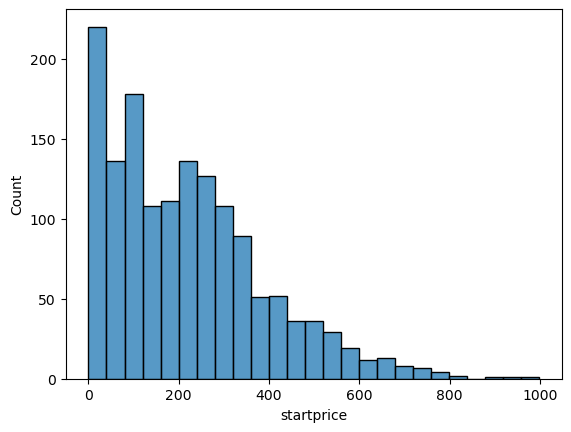

In [25]:
sns.histplot(data['startprice'])

In [26]:
data[['startprice', 'productline']].groupby('productline').value_counts(sort=False)

productline    startprice
Galaxy_Note10  0.99          20
               1.00           8
               1.99           1
               10.00          1
               24.99          1
                             ..
Unknown        590.00         1
               595.00         1
               599.00         1
               599.99         1
               700.00         2
Name: count, Length: 832, dtype: int64

In [27]:
data[['startprice', 'productline']].groupby('productline').describe()

startprice                                                     \
                   count        mean         std     min       25%      50%   
productline                                                                   
Galaxy_Note10      351.0  366.931311  198.259953    0.99  250.0000  380.000   
Galaxy_Note8       153.0  176.065033  122.104147    0.01   99.0000  187.500   
Galaxy_Note9       107.0  254.561402  126.208902    0.01  177.5000  259.950   
Galaxy_S10           8.0  294.583750   79.754787  160.00  246.2500  301.335   
Galaxy_S7          227.0   84.190000   66.527227    0.01   48.7450   79.000   
Galaxy_S8          277.0  165.883321  123.743959    0.01   89.9900  155.000   
Galaxy_S9          158.0  231.268101  136.186507    0.01  145.8700  249.970   
Unknown            204.0  171.994265  156.092171    0.99   44.9975  149.990   

                                 
                    75%     max  
productline                      
Galaxy_Note10  499.9700  939.00  
Galaxy_Note8   239.8800  699.95  
Galaxy_Note9   349.9900  575.00  
Galaxy_S10     341.7500  420.00  
Galaxy_S7      104.9900  499.00  
Galaxy_S8      230.0000  999.00  
Galaxy_S9      300.0000  695.00  
Unknown        259.9925  700.00

In [28]:
data.groupby('productline')['sold'].value_counts(sort=False)

productline    sold
Galaxy_Note10  0       202
               1       149
Galaxy_Note8   0        73
               1        80
Galaxy_Note9   0        58
               1        49
Galaxy_S10     0         4
               1         4
Galaxy_S7      0       102
               1       125
Galaxy_S8      0       145
               1       132
Galaxy_S9      0        93
               1        65
Unknown        0       122
               1        82
Name: count, dtype: int64

# Feature Engineering

### 문자형 컬럼 => 정수형으로 바꾸기

In [29]:
data_delca['color'].value_counts()

color
colorlessness     593
White             328
Midnight Black    274
Space Gray        180
Gold               52
Black              38
Aura Black         19
Prism Black         1
Name: count, dtype: int64

In [30]:
data_delca['productline'].value_counts()

productline
Galaxy_Note10    351
Galaxy_S8        277
Galaxy_S7        227
Unknown          204
Galaxy_S9        158
Galaxy_Note8     153
Galaxy_Note9     107
Galaxy_S10         8
Name: count, dtype: int64

In [31]:
data_delca['noDescription'].value_counts()

noDescription
contains description    856
no description          629
Name: count, dtype: int64

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
data_delca['color'] =le.fit_transform(data_delca['color'])
data_delca['productline'] =le2.fit_transform(data_delca['productline'])
data_delca['noDescription'] =le3.fit_transform(data_delca['noDescription'])

In [33]:
print(data_delca['color'])
print(type(data_delca['color']))
print()
print(data_delca['productline'])
print(type(data_delca['productline']))
print()
print(data_delca['noDescription'])
print(type(data_delca['noDescription']))

0       6
1       7
2       7
3       5
4       5
       ..
1480    7
1481    3
1482    5
1483    3
1484    3
Name: color, Length: 1485, dtype: int64
<class 'pandas.core.series.Series'>

0       6
1       2
2       7
3       2
4       5
       ..
1480    4
1481    6
1482    0
1483    4
1484    4
Name: productline, Length: 1485, dtype: int64
<class 'pandas.core.series.Series'>

0       0
1       0
2       1
3       0
4       0
       ..
1480    1
1481    1
1482    1
1483    1
1484    1
Name: noDescription, Length: 1485, dtype: int64
<class 'pandas.core.series.Series'>


In [34]:
data_delca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   color                 1485 non-null   int64  
 3   productline           1485 non-null   int64  
 4   noDescription         1485 non-null   int64  
 5   charCountDescription  1485 non-null   int64  
 6   upperCaseDescription  1485 non-null   int64  
 7   sold                  1485 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 92.9 KB


In [35]:
le.inverse_transform(data_delca['color'])

array(['White', 'colorlessness', 'colorlessness', ..., 'Space Gray',
       'Midnight Black', 'Midnight Black'], dtype=object)

In [36]:
le2.inverse_transform(data_delca['productline'])

array(['Galaxy_S9', 'Galaxy_Note9', 'Unknown', ..., 'Galaxy_Note10',
       'Galaxy_S7', 'Galaxy_S7'], dtype=object)

In [37]:
le3.inverse_transform(data_delca['noDescription'])

array(['contains description', 'contains description', 'no description',
       ..., 'no description', 'no description', 'no description'],
      dtype=object)

# 연속형 변수 범위 정해주기

In [38]:
# data_delca['color'].value_counts()

# colorlessness     593 / 7
# White             328 / 6
# Midnight Black    274 / 3
# Space Gray        180 / 5
# Gold               52 /2
# Black              38 /1
# Aura Black         19 /0
# Prism Black         1 / 4

In [39]:
def color_num(x):
    if x == 0:
        return "B"
    elif x == 1:
        return "B"
    elif x == 2:
        return "G"
    elif x == 3:
        return "B"
    elif x == 4:
        return "B"
    elif x == 5:
        return "G"
    elif x == 6:
        return "W"
    elif x == 7:
        return "N"

In [40]:
data_delca['color'] = data_delca['color'].apply(color_num)

In [41]:
data_delca.head()

,BuyItNow,startprice,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,W,6,0,0,0,1
1,0,235.00,N,2,0,0,0,0
2,0,199.99,N,7,1,100,2,0
3,1,175.00,G,2,0,0,0,1
4,1,100.00,G,5,0,0,0,1


In [42]:
data_delca[['color', 'BuyItNow']].groupby('color').value_counts(sort=False)

color  BuyItNow
B      0           165
       1           167
G      0           129
       1           103
N      0           336
       1           257
W      0           188
       1           140
Name: count, dtype: int64

In [43]:
# data_delca['productline'].value_counts()

# Galaxy_Note10    351 / 0
# Galaxy_S8        277 / 5
# Galaxy_S7        227 / 4
# Unknown          204 / 7
# Galaxy_S9        158 / 6
# Galaxy_Note8     153 / 1
# Galaxy_Note9     107 / 2
# Galaxy_S10         8 / 3

In [44]:
def productline_num(x):
    if x == 0:
        return "G_N"
    elif x == 1:
        return "G_N"
    elif x == 2:
        return "G_N"
    elif x == 3:
        return "G_S"
    elif x == 4:
        return "G_S"
    elif x == 5:
        return "G_S"
    elif x == 6:
        return "G_S"
    elif x == 7:
        return "X"

In [45]:
data_delca['productline'] = data_delca['productline'].apply(productline_num)

In [46]:
data_delca.head()

,BuyItNow,startprice,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,W,G_S,0,0,0,1
1,0,235.00,N,G_N,0,0,0,0
2,0,199.99,N,X,1,100,2,0
3,1,175.00,G,G_N,0,0,0,1
4,1,100.00,G,G_S,0,0,0,1


In [47]:
data_delca[['productline', 'BuyItNow']].groupby('productline').value_counts(sort=False)

productline  BuyItNow
G_N          0           348
             1           263
G_S          0           350
             1           320
X            0           120
             1            84
Name: count, dtype: int64

In [48]:
data_delca['startprice'].value_counts()

startprice
0.99      114
100.00     43
50.00      33
150.00     32
200.00     29
         ... 
144.50      1
224.99      1
54.99       1
57.50       1
91.00       1
Name: count, Length: 485, dtype: int64

In [49]:
data_delca['startprice'].min()

np.float64(0.01)

In [50]:
data_delca['startprice'].max()

np.float64(999.0)

In [51]:
def startprice_num(x):
    if 0 < x < 100:
        return "under 100"
    elif 100 <= x < 200:
        return "100s"
    elif 200 <= x < 300:
        return "200s"
    elif 300 <= x < 400:
        return "300s"
    elif 400 <= x < 500:
        return "400s"
    elif 500 <= x < 600:
        return "500s"
    elif 600 <= x < 700:
        return "600s"
    elif 700 <= x < 800:
        return "700s"
    elif 800 <= x < 900:
        return "800s"
    elif 900 <= x < 1000:
        return "900s"

In [52]:
data_delca['startprice'] = data_delca['startprice'].apply(startprice_num)

In [53]:
data_delca.head()

,BuyItNow,startprice,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,100s,W,G_S,0,0,0,1
1,0,200s,N,G_N,0,0,0,0
2,0,100s,N,X,1,100,2,0
3,1,100s,G,G_N,0,0,0,1
4,1,100s,G,G_S,0,0,0,1


In [54]:
data_delca[['startprice', 'BuyItNow']].groupby('startprice').value_counts(sort=False)

startprice  BuyItNow
100s        0           168
            1           148
200s        0           210
            1            90
300s        0           158
            1            38
400s        0            83
            1            17
500s        0            52
            1            14
600s        0            26
            1             2
700s        0            12
            1             2
800s        0             1
            1             1
900s        0             3
under 100   0           105
            1           355
Name: count, dtype: int64

# 구간 나눈 후 시각화

<Axes: xlabel='color,BuyItNow'>

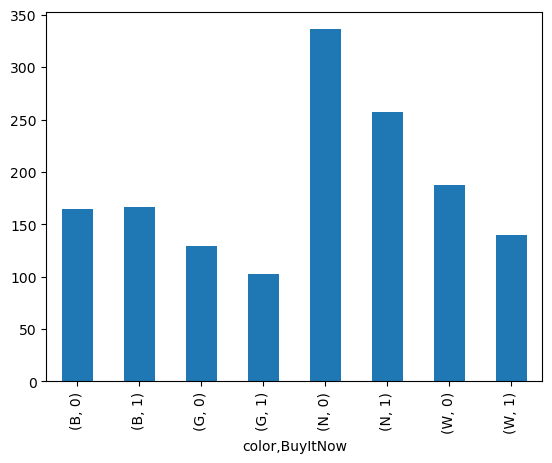

In [55]:
data_delca[['color', 'BuyItNow']].groupby('color').value_counts(sort=False).plot(kind='bar')

<Axes: xlabel='productline,BuyItNow'>

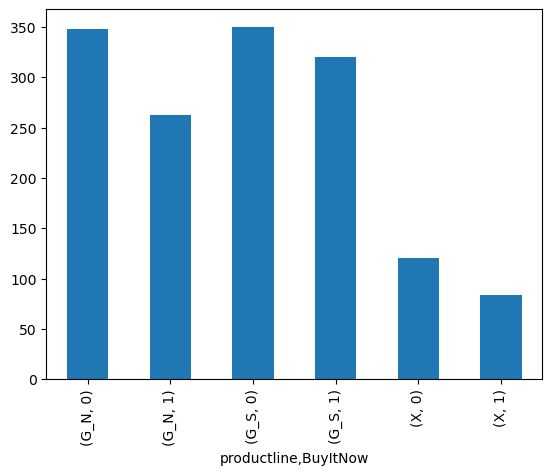

In [56]:
data_delca[['productline', 'BuyItNow']].groupby('productline').value_counts(sort=False).plot(kind='bar')

<Axes: xlabel='startprice,BuyItNow'>

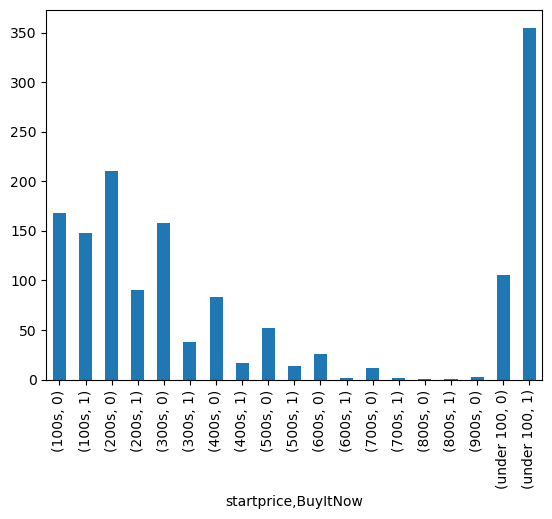

In [57]:
data_delca[['startprice', 'BuyItNow']].groupby('startprice').value_counts(sort=False).plot(kind='bar')

In [58]:
data_delca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   BuyItNow              1485 non-null   int64 
 1   startprice            1485 non-null   object
 2   color                 1485 non-null   object
 3   productline           1485 non-null   object
 4   noDescription         1485 non-null   int64 
 5   charCountDescription  1485 non-null   int64 
 6   upperCaseDescription  1485 non-null   int64 
 7   sold                  1485 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 92.9+ KB


In [59]:
data_delca.head(30)

,BuyItNow,startprice,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,100s,W,G_S,0,0,0,1
1,0,200s,N,G_N,0,0,0,0
2,0,100s,N,X,1,100,2,0
3,1,100s,G,G_N,0,0,0,1
4,1,100s,G,G_S,0,0,0,1
5,1,under 100,W,G_S,0,0,0,1
6,1,100s,W,G_S,0,0,0,1
7,0,100s,B,G_S,1,92,0,1
8,0,under 100,W,G_S,0,0,0,0
9,1,under 100,B,G_S,1,96,41,1


# 데이터 분리 및 분석

In [60]:
data_delca.columns

Index(['BuyItNow', 'startprice', 'color', 'productline', 'noDescription',
       'charCountDescription', 'upperCaseDescription', 'sold'],
      dtype='object')

In [61]:
data_corr = data_delca[['BuyItNow','charCountDescription', 'upperCaseDescription', 'sold']]

<Axes: >

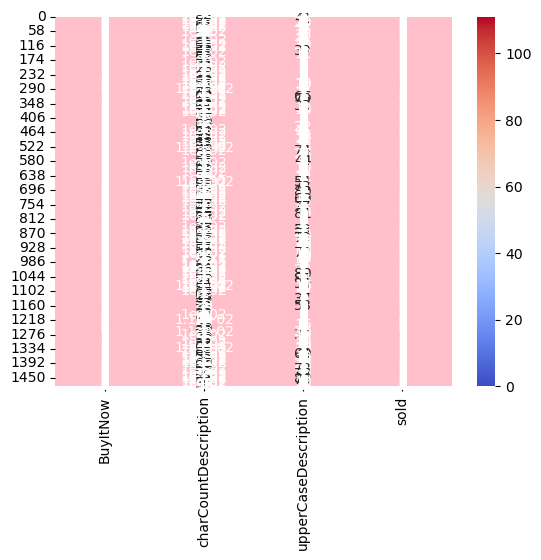

In [62]:
# ??
sns.heatmap(data_corr, cmap='coolwarm', annot=True, linecolor='pink', linewidth=3)

In [63]:
data_delca.head()

,BuyItNow,startprice,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,100s,W,G_S,0,0,0,1
1,0,200s,N,G_N,0,0,0,0
2,0,100s,N,X,1,100,2,0
3,1,100s,G,G_N,0,0,0,1
4,1,100s,G,G_S,0,0,0,1


In [64]:
data_corr.corr()

,BuyItNow,charCountDescription,upperCaseDescription,sold
BuyItNow,1.000000,-0.092170,-0.018091,0.540054
charCountDescription,-0.092170,1.000000,0.394730,-0.073461
upperCaseDescription,-0.018091,0.394730,1.000000,-0.058993
sold,0.540054,-0.073461,-0.058993,1.000000


<Axes: xlabel='BuyItNow'>

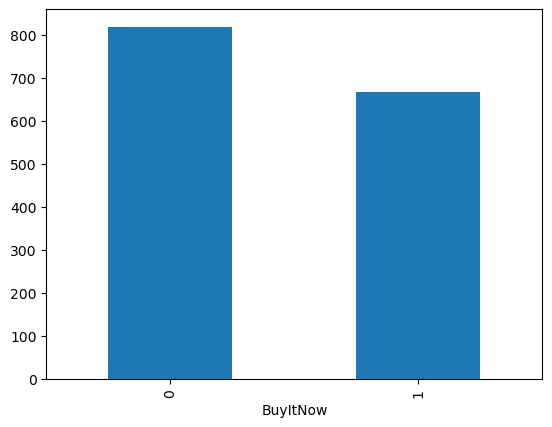

In [65]:
data_delca['BuyItNow'].value_counts().plot(kind='bar')

<Axes: xlabel='startprice'>

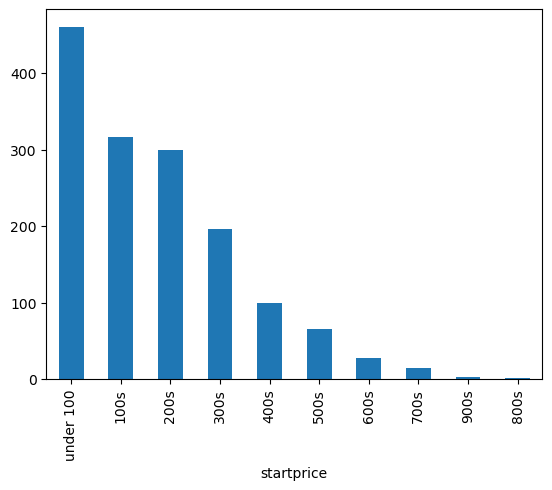

In [66]:
data_delca['startprice'].value_counts().plot(kind='bar')

<Axes: xlabel='color'>

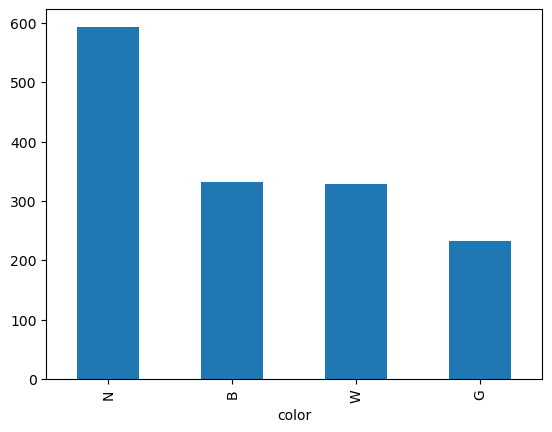

In [67]:
data_delca['color'].value_counts().plot(kind='bar')

<Axes: xlabel='productline'>

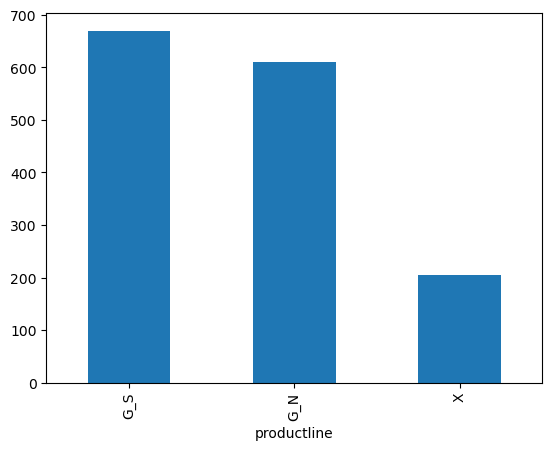

In [68]:
data_delca['productline'].value_counts().plot(kind='bar')

<Axes: xlabel='noDescription'>

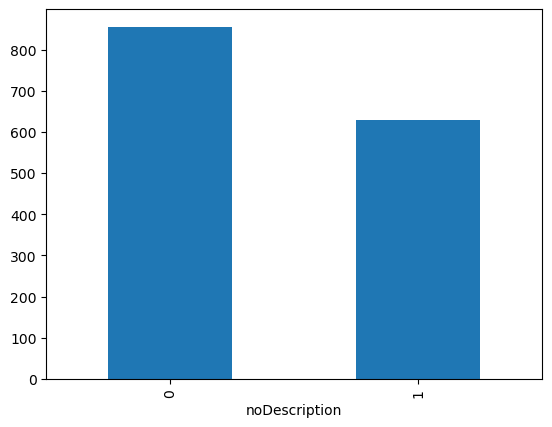

In [69]:
data_delca['noDescription'].value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

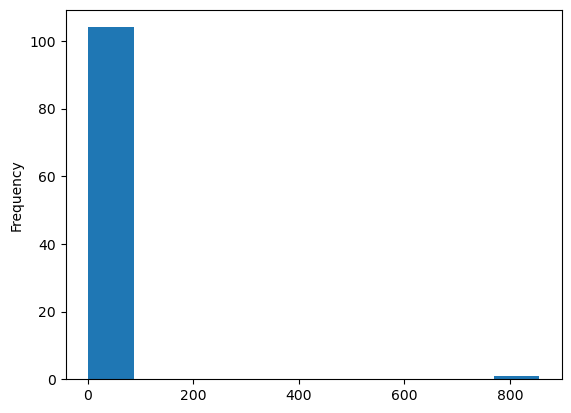

In [70]:
data_delca['charCountDescription'].value_counts().plot(kind='hist')

<Axes: ylabel='Frequency'>

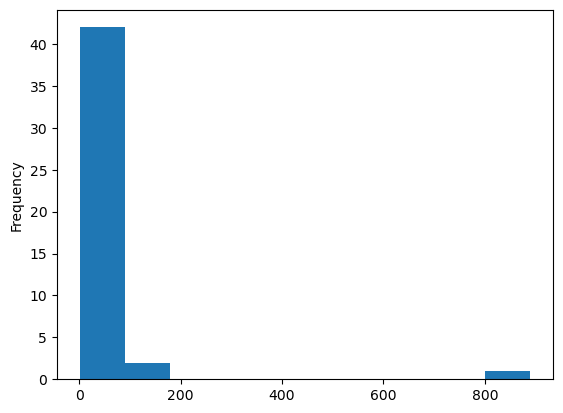

In [71]:
data_delca['upperCaseDescription'].value_counts().plot(kind='hist')

<Axes: xlabel='sold'>

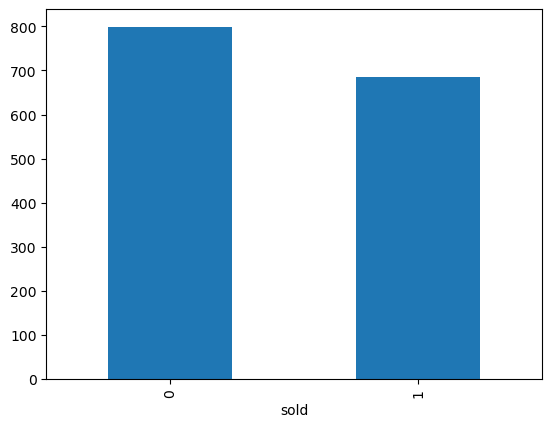

In [72]:
data_delca['sold'].value_counts().plot(kind='bar')

### 카테고리 변수의 더미변수화 : get_dummies

In [73]:
data_delca = pd.get_dummies(data_delca, columns=['startprice', 'color', 'productline'], drop_first=True)

In [74]:
data_delca.head()

,BuyItNow,noDescription,charCountDescription,upperCaseDescription,sold,startprice_200s,startprice_300s,startprice_400s,startprice_500s,startprice_600s,startprice_700s,startprice_800s,startprice_900s,startprice_under 100,color_G,color_N,color_W,productline_G_S,productline_X
0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,False,True,True,False
1,0,0,0,0,0,True,False,False,False,False,False,False,False,False,False,True,False,False,False
2,0,1,100,2,0,False,False,False,False,False,False,False,False,False,False,True,False,False,True
3,1,0,0,0,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,1,0,0,0,1,False,False,False,False,False,False,False,False,False,True,False,False,True,False


In [75]:
data_delca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   BuyItNow              1485 non-null   int64
 1   noDescription         1485 non-null   int64
 2   charCountDescription  1485 non-null   int64
 3   upperCaseDescription  1485 non-null   int64
 4   sold                  1485 non-null   int64
 5   startprice_200s       1485 non-null   bool 
 6   startprice_300s       1485 non-null   bool 
 7   startprice_400s       1485 non-null   bool 
 8   startprice_500s       1485 non-null   bool 
 9   startprice_600s       1485 non-null   bool 
 10  startprice_700s       1485 non-null   bool 
 11  startprice_800s       1485 non-null   bool 
 12  startprice_900s       1485 non-null   bool 
 13  startprice_under 100  1485 non-null   bool 
 14  color_G               1485 non-null   bool 
 15  color_N               1485 non-null   bool 
 16  color_

# 성능 평가 및 성능 개선을 위한 튜닝

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [77]:
X = data_delca.drop('BuyItNow', axis=1)
y = data_delca['BuyItNow']

In [78]:
X

,noDescription,charCountDescription,upperCaseDescription,sold,startprice_200s,startprice_300s,startprice_400s,startprice_500s,startprice_600s,startprice_700s,startprice_800s,startprice_900s,startprice_under 100,color_G,color_N,color_W,productline_G_S,productline_X
0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,False,True,True,False
1,0,0,0,0,True,False,False,False,False,False,False,False,False,False,True,False,False,False
2,1,100,2,0,False,False,False,False,False,False,False,False,False,False,True,False,False,True
3,0,0,0,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,0,0,0,1,False,False,False,False,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,1,96,2,0,False,False,False,False,False,False,False,False,True,False,True,False,True,False
1481,1,97,5,1,True,False,False,False,False,False,False,False,False,False,False,False,True,False
1482,1,93,1,0,False,True,False,False,False,False,False,False,False,True,False,False,False,False
1483,1,92,2,1,False,False,False,False,False,False,False,False,True,False,False,False,True,False


In [79]:
y

0       0
1       0
2       0
3       1
4       1
       ..
1480    0
1481    0
1482    0
1483    0
1484    0
Name: BuyItNow, Length: 1485, dtype: int64

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 8)

In [84]:
dtc = DecisionTreeClassifier(max_depth= 9, random_state=7)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.7757847533632287
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       239
           1       0.77      0.73      0.75       207

    accuracy                           0.78       446
   macro avg       0.78      0.77      0.77       446
weighted avg       0.78      0.78      0.78       446



### 훈련 데이터와 테스트 데이터 비율 변화로 성능 튜닝하기

In [89]:
# 3번째 b
for ts in range(1, 10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = ts/10, random_state = 8)
    dtc = DecisionTreeClassifier()
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_test)
    print()
    print(ts, accuracy_score(y_test, pred))
    print(ts, classification_report(y_test, pred))


1 0.7718120805369127
1               precision    recall  f1-score   support

           0       0.76      0.84      0.80        81
           1       0.78      0.69      0.73        68

    accuracy                           0.77       149
   macro avg       0.77      0.77      0.77       149
weighted avg       0.77      0.77      0.77       149


2 0.7407407407407407
2               precision    recall  f1-score   support

           0       0.74      0.76      0.75       151
           1       0.74      0.72      0.73       146

    accuracy                           0.74       297
   macro avg       0.74      0.74      0.74       297
weighted avg       0.74      0.74      0.74       297


3 0.7757847533632287
3               precision    recall  f1-score   support

           0       0.78      0.80      0.79       239
           1       0.77      0.74      0.75       207

    accuracy                           0.78       446
   macro avg       0.77      0.77      0.77       446
we

### 하이퍼파라미터 튜닝

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 8)

In [91]:
# 17번째 b
for i in range(1, 20):
    dtc = DecisionTreeClassifier(max_depth=i, random_state=8)
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_test)
    print(i, accuracy_score(y_test, pred))
    print(i, classification_report(y_test, pred))

1 0.7511210762331838
1               precision    recall  f1-score   support

           0       0.78      0.74      0.76       239
           1       0.72      0.76      0.74       207

    accuracy                           0.75       446
   macro avg       0.75      0.75      0.75       446
weighted avg       0.75      0.75      0.75       446

2 0.7511210762331838
2               precision    recall  f1-score   support

           0       0.78      0.74      0.76       239
           1       0.72      0.76      0.74       207

    accuracy                           0.75       446
   macro avg       0.75      0.75      0.75       446
weighted avg       0.75      0.75      0.75       446

3 0.7645739910313901
3               precision    recall  f1-score   support

           0       0.78      0.79      0.78       239
           1       0.75      0.74      0.74       207

    accuracy                           0.76       446
   macro avg       0.76      0.76      0.76       446
weigh

### criterion : 분류 알고리즘 변경하면서 최적화

In [92]:
# 17번째 b
for i in range(1, 20):
    dtc = DecisionTreeClassifier(criterion="entropy", max_depth=i, random_state=8)
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_test)
    print(i, accuracy_score(y_test, pred))
    print(i, classification_report(y_test, pred))

1 0.7511210762331838
1               precision    recall  f1-score   support

           0       0.78      0.74      0.76       239
           1       0.72      0.76      0.74       207

    accuracy                           0.75       446
   macro avg       0.75      0.75      0.75       446
weighted avg       0.75      0.75      0.75       446

2 0.7511210762331838
2               precision    recall  f1-score   support

           0       0.78      0.74      0.76       239
           1       0.72      0.76      0.74       207

    accuracy                           0.75       446
   macro avg       0.75      0.75      0.75       446
weighted avg       0.75      0.75      0.75       446

3 0.7645739910313901
3               precision    recall  f1-score   support

           0       0.78      0.79      0.78       239
           1       0.75      0.74      0.74       207

    accuracy                           0.76       446
   macro avg       0.76      0.76      0.76       446
weigh

### log_loss로 분석

In [93]:
# 17번째 b
for i in range(1, 20):
    dtc = DecisionTreeClassifier(criterion="log_loss", max_depth=i, random_state=8)
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_test)
    print(i, accuracy_score(y_test, pred))
    print(i, classification_report(y_test, pred))7

1 0.7511210762331838
1               precision    recall  f1-score   support

           0       0.78      0.74      0.76       239
           1       0.72      0.76      0.74       207

    accuracy                           0.75       446
   macro avg       0.75      0.75      0.75       446
weighted avg       0.75      0.75      0.75       446

2 0.7511210762331838
2               precision    recall  f1-score   support

           0       0.78      0.74      0.76       239
           1       0.72      0.76      0.74       207

    accuracy                           0.75       446
   macro avg       0.75      0.75      0.75       446
weighted avg       0.75      0.75      0.75       446

3 0.7645739910313901
3               precision    recall  f1-score   support

           0       0.78      0.79      0.78       239
           1       0.75      0.74      0.74       207

    accuracy                           0.76       446
   macro avg       0.76      0.76      0.76       446
weigh

### Log Loss: 확률 예측의 품질을 평가하고, 모델의 출력 확률을 최적화하는 데 중점을 둡니다.
### Criterion: 트리 기반 모델에서 데이터를 분할하는 기준을 조정하여 모델의 분할 방식과 결과를 개선합니다.
### 하이퍼파라미터 튜닝: 모델의 다양한 매개변수를 최적화하여 성능을 극대화하고, 과적합을 방지합니다.
### 훈련 데이터와 테스트 데이터 비율 변화: 모델이 학습하는 데이터와 평가하는 데이터의 비율을 조정하여 학습 성능과 일반화 성능을 균형 있게 유지합니다.

### 의사결정나무(DecisionTree) 시각화

In [94]:
from sklearn.tree import plot_tree

In [95]:
X_train.columns

Index(['noDescription', 'charCountDescription', 'upperCaseDescription', 'sold',
       'startprice_200s', 'startprice_300s', 'startprice_400s',
       'startprice_500s', 'startprice_600s', 'startprice_700s',
       'startprice_800s', 'startprice_900s', 'startprice_under 100', 'color_G',
       'color_N', 'color_W', 'productline_G_S', 'productline_X'],
      dtype='object')

[Text(0.7126707927489178, 0.975, 'sold <= 0.5\nlog_loss = 0.991\nsamples = 1039\nvalue = [579, 460]'),
 Text(0.5226765422077922, 0.925, 'charCountDescription <= 98.5\nlog_loss = 0.707\nsamples = 571\nvalue = [461.0, 110.0]'),
 Text(0.617673667478355, 0.95, 'True  '),
 Text(0.45660849567099565, 0.875, 'startprice_600s <= 0.5\nlog_loss = 0.749\nsamples = 495\nvalue = [389, 106]'),
 Text(0.4508364898989899, 0.825, 'startprice_under 100 <= 0.5\nlog_loss = 0.763\nsamples = 479\nvalue = [373, 106]'),
 Text(0.36271194083694086, 0.775, 'startprice_300s <= 0.5\nlog_loss = 0.725\nsamples = 417\nvalue = [333, 84]'),
 Text(0.2838654401154401, 0.725, 'upperCaseDescription <= 3.5\nlog_loss = 0.752\nsamples = 325\nvalue = [255, 70]'),
 Text(0.22285353535353536, 0.675, 'charCountDescription <= 94.0\nlog_loss = 0.72\nsamples = 271\nvalue = [217, 54]'),
 Text(0.21708152958152957, 0.625, 'charCountDescription <= 87.5\nlog_loss = 0.74\nsamples = 258\nvalue = [204, 54]'),
 Text(0.1571067821067821, 0.575, '

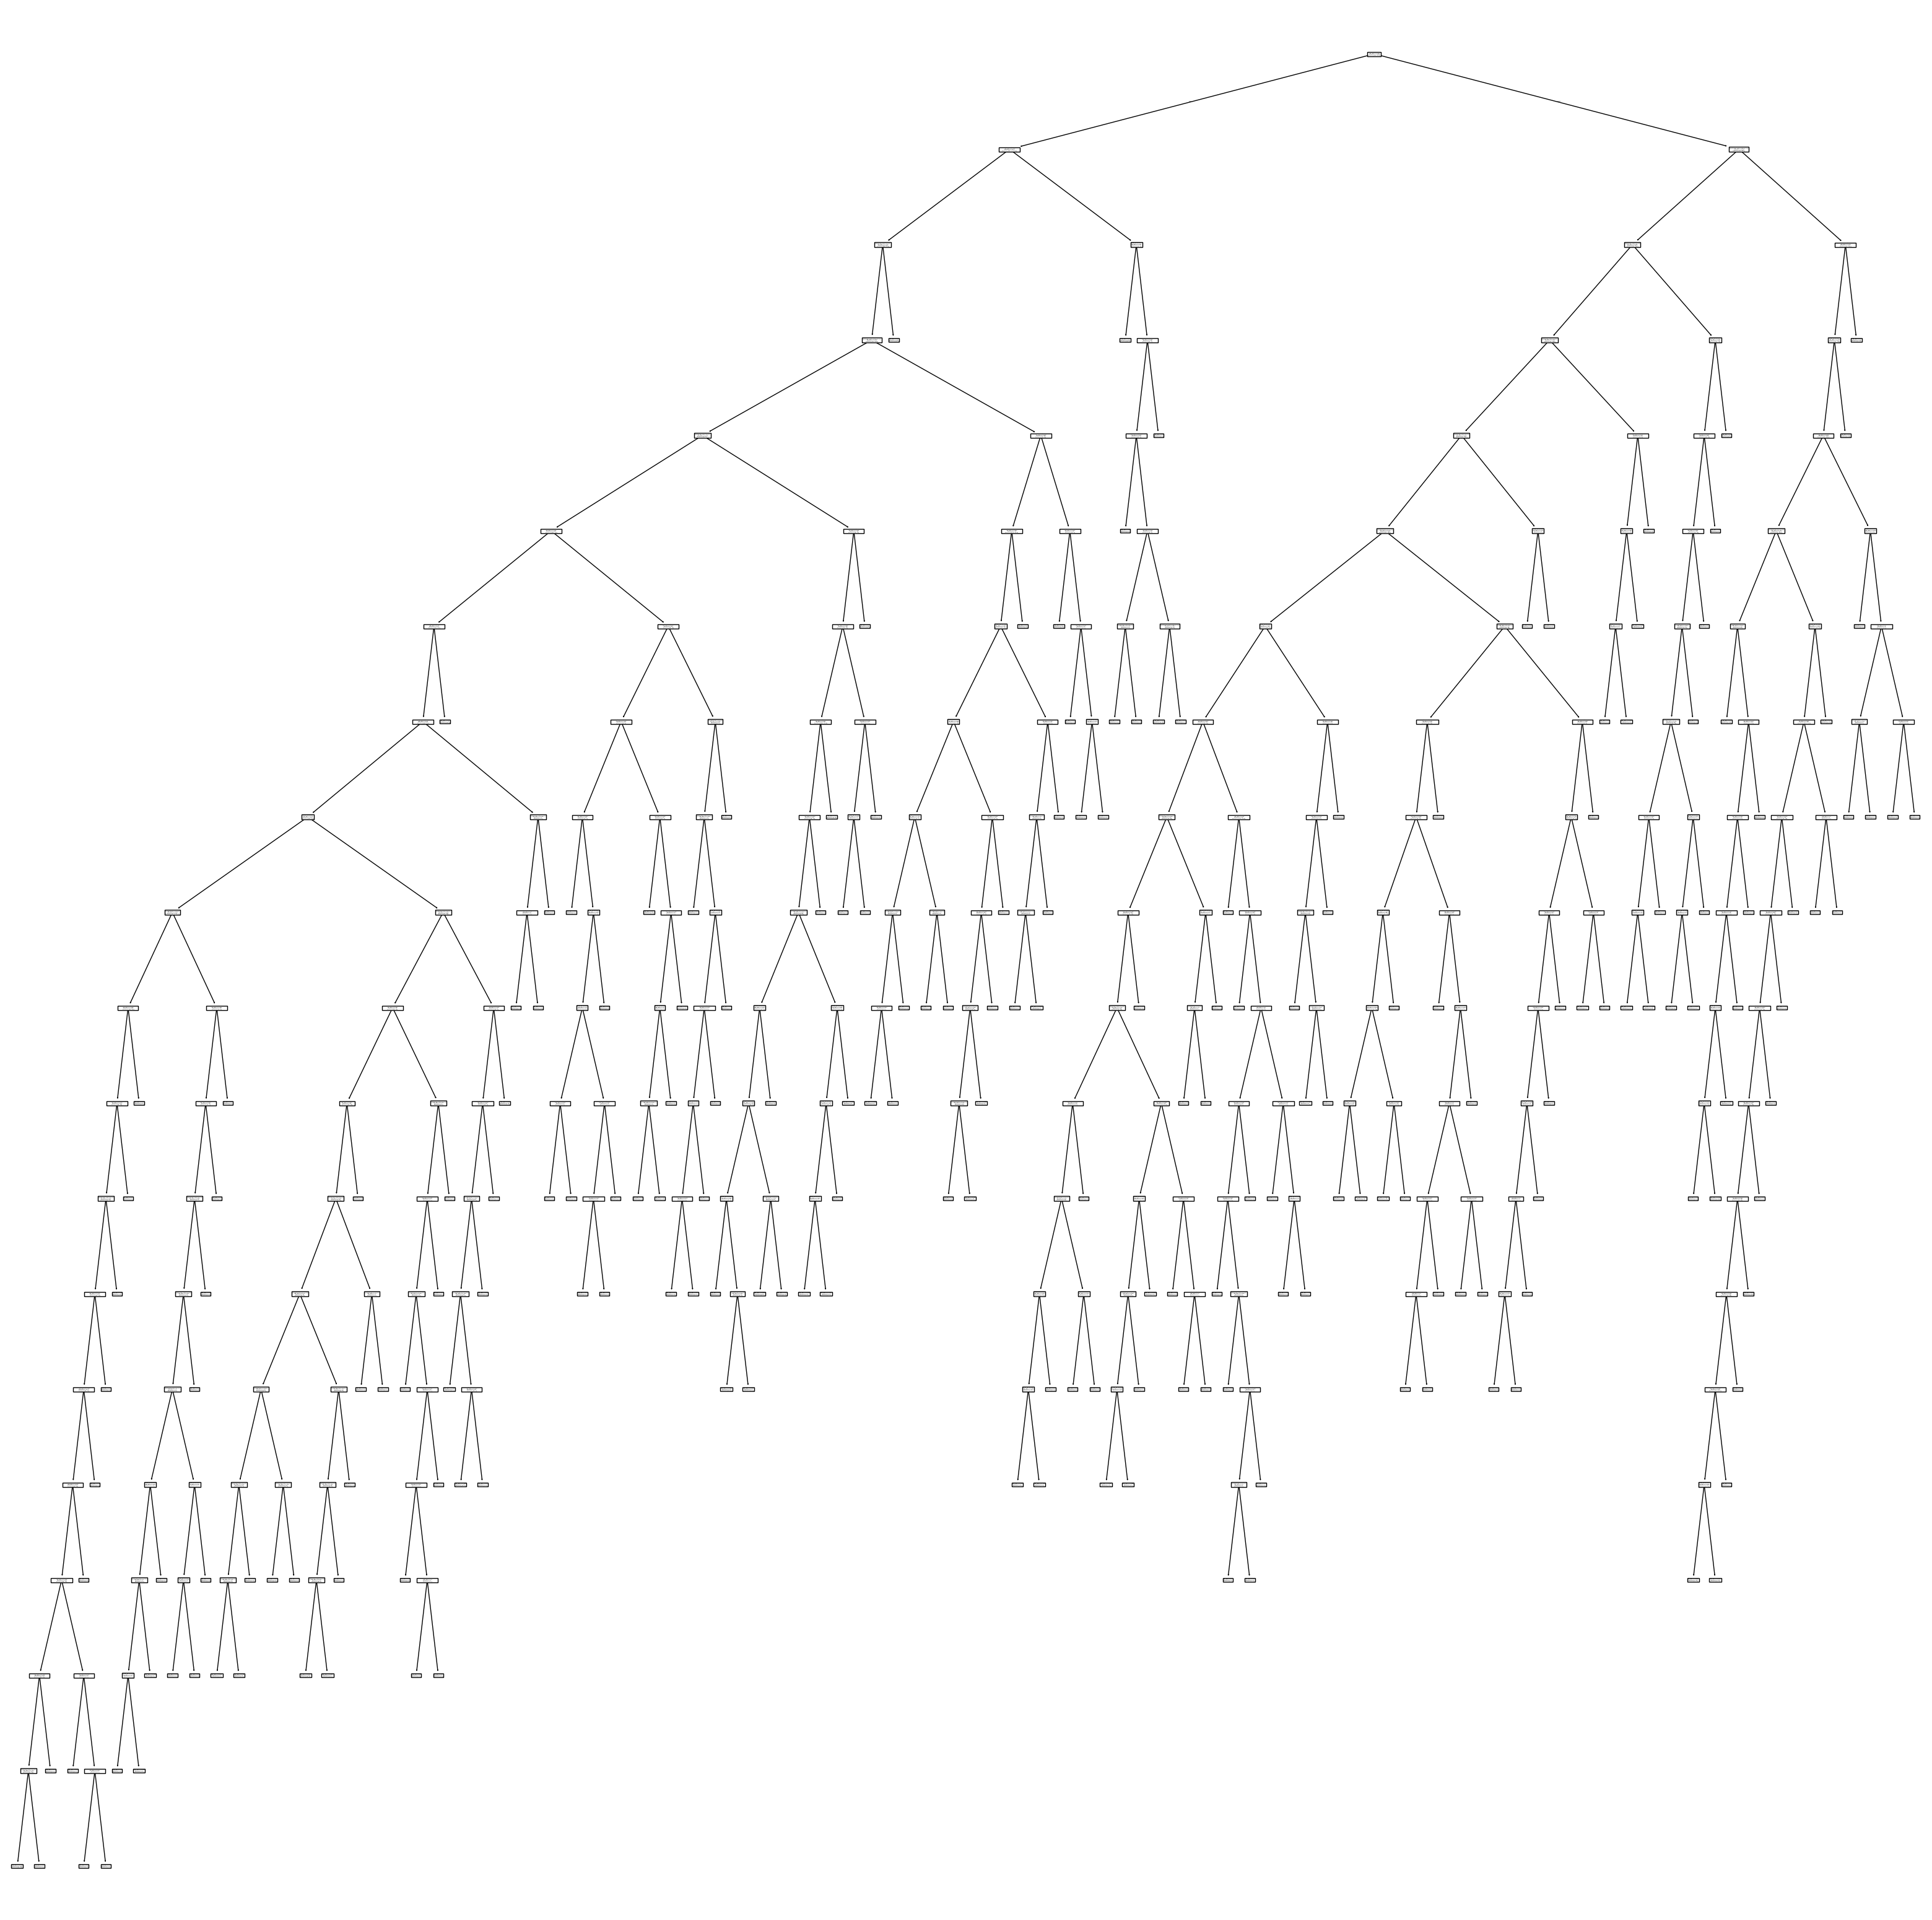

In [96]:
plt.figure(figsize=(40,40))
plot_tree(dtc, feature_names= X_train.columns)